In [603]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ul>
<li><b>batter_power</b>: Total energy a battery can store in one time measured in mAh</li>
<li><b>blue</b>: Has bluetooth or not</li>
<li><b>clock_speed</b>: speed at which microprocessor executes instructions</li>
<li><b>dual_sim</b>: Has dual sim support or not</li>
<li><b>fc</b>: Front Camera mega pixels</li>
<li><b>four_g</b>: Has 4G or not</li>
<li><b>int_memory</b>: Internal Memory in Gigabytes</li>
<li><b>m_dep</b>: Mobile Depth in cm</li>
<li><b>mobile_wt</b>: Weight of mobile phone</li>
<li><b>n_cores</b>: Number of cores of processor</li>
<li><b>pc</b>: Primary Camera mega pixels</li>
<li><b>px_height</b>: Pixel Resolution Height</li>
<li><b>px_width</b>: Pixel Resolution Width</li>
<li><b>ram</b>: Random Access Memory in Mega Bytes</li>
<li><b>sc_h</b>: Screen Height of mobile in cm</li>
<li><b>sc_w</b>: Screen Width of mobile in cm</li>
<li><b>talk_time</b>: longest time that a single battery charge will last when you are talking</li>
<li><b>three_g</b>: Has 3G or not</li>
<li><b>touch_screen</b>: Has touch screen or not</li>
<li><b>wifi</b>: Has wifi or no</li>
<li><b>price_range</b>: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</li>
</ul>

In [604]:
train_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_test.csv'

In [605]:
def download_read_data(path):
    
    data_path = urllib.request.urlopen(path)
    data = pd.read_csv(data_path)

    return data

In [606]:
mobile_train = download_read_data(train_data_path)

In [607]:
mobile_test = download_read_data(test_data_path)

In [608]:
display(mobile_train.head(), mobile_train.shape)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


(2000, 21)

In [609]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## EDA

In [610]:
df_train = mobile_train.copy()

In [611]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<b>Observation:</b>
<p>Some of the columns have a high std, meaning they probably have outliers. Also for some columns the 50 perc. is different from the mean, meaning these columns probably have a non normal distribution.</p>

### Checking missing values

In [612]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Checking for duplicates

In [613]:
dups = df_train.duplicated()
dups.any()

False

In [614]:
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<b>Observations:</b>
<p>We have balanced classes</p>

In [615]:
non_binary_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                   'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                   'sc_h', 'sc_w', 'talk_time']

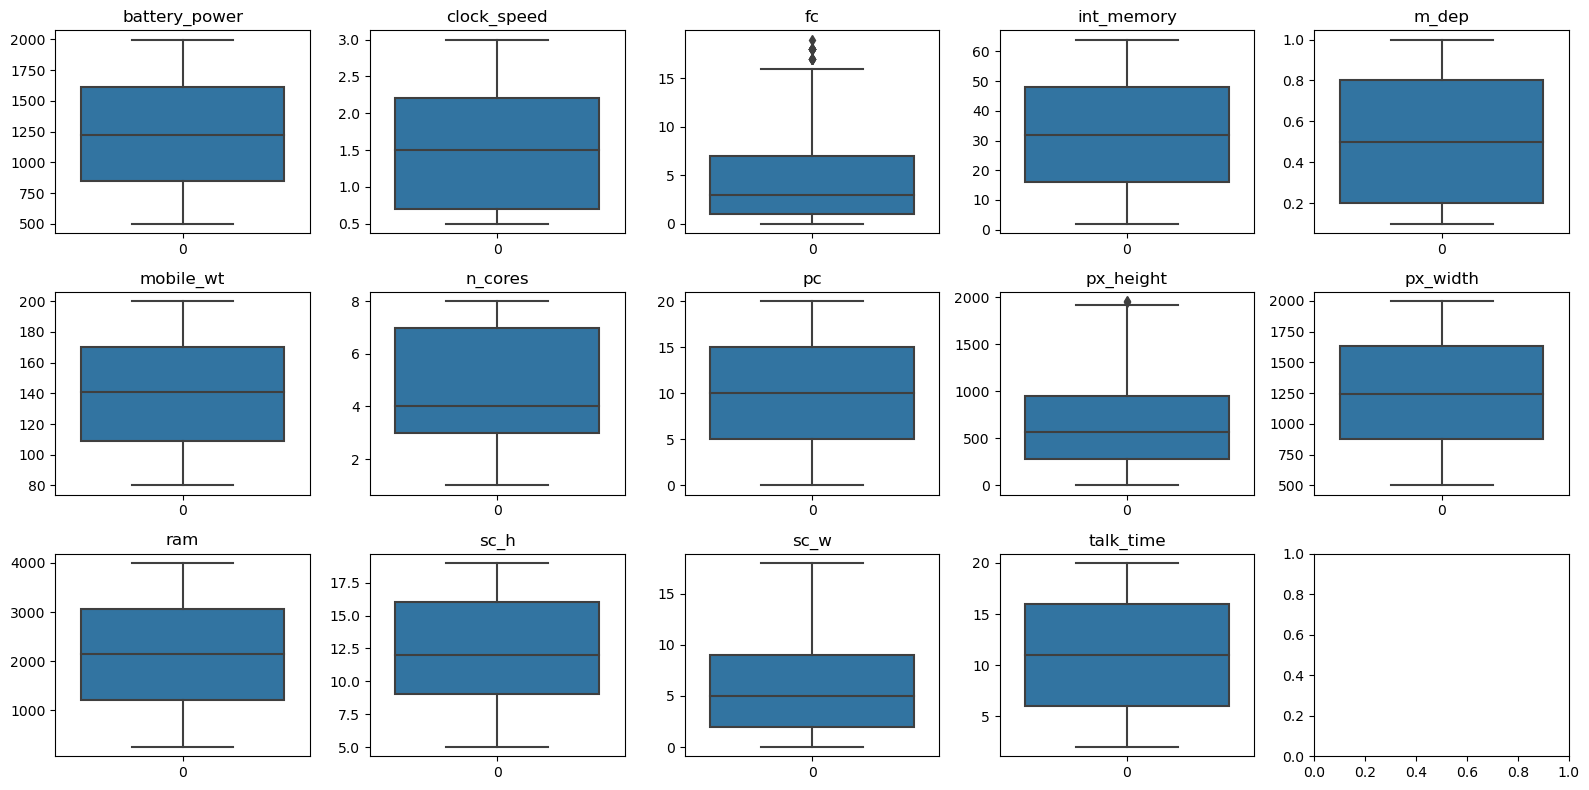

In [616]:
fig, ax = plt.subplots(3, 5, figsize=(16, 8))
ax = ax.flatten()

for i, col in enumerate(df_train[non_binary_cols]):
    sns.boxplot(data=df_train[col], ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

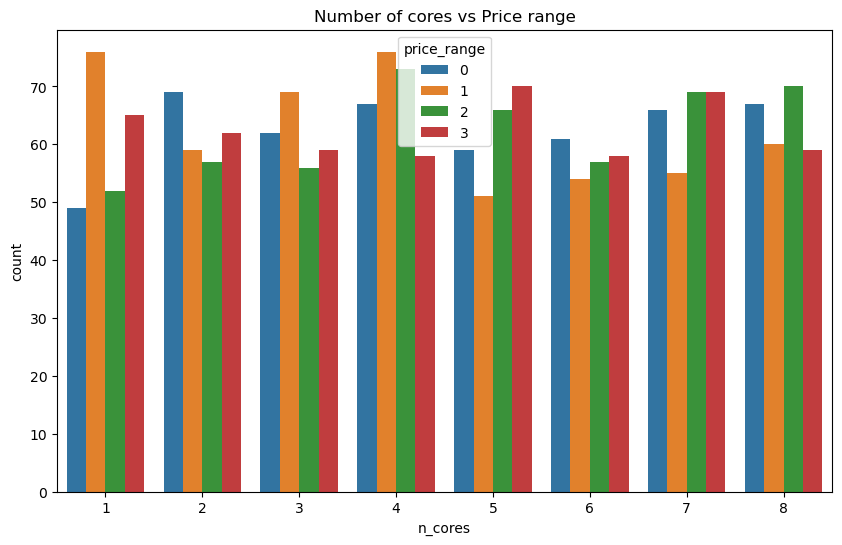

In [617]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='n_cores', hue='price_range')
plt.title('Number of cores vs Price range')
plt.show()

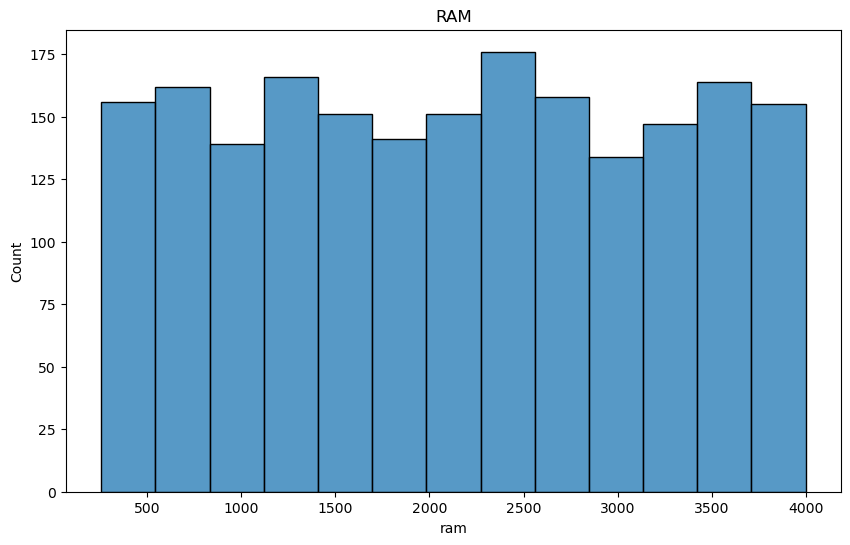

In [618]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='ram')
plt.title('RAM')
plt.show()

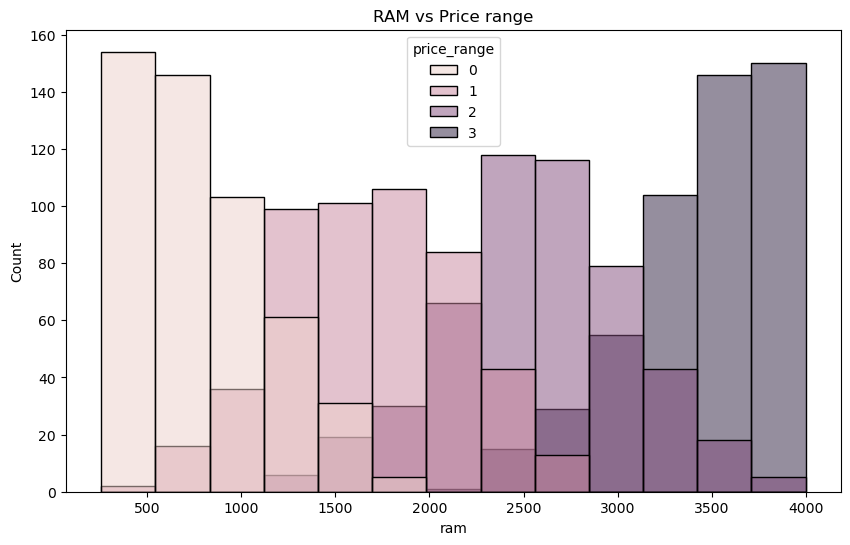

In [619]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='ram', hue='price_range')
plt.title('RAM vs Price range')
plt.show()

<p>Overall phones with over 2.5gb ram seem to be more expensive</p>

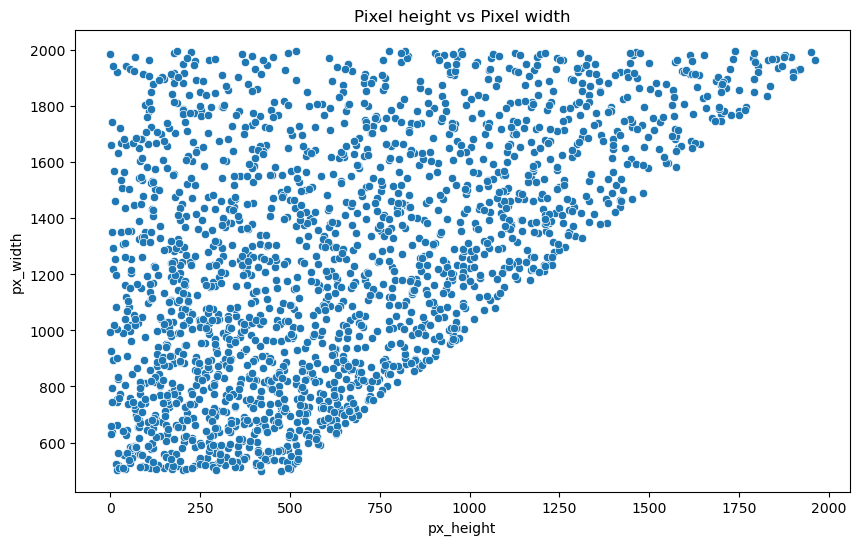

In [620]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='px_height', y='px_width')
plt.title('Pixel height vs Pixel width')
plt.show()

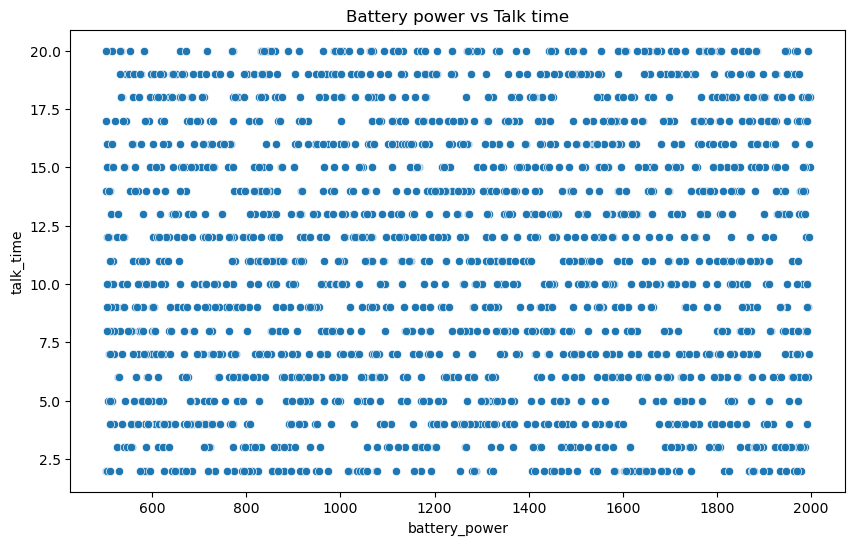

In [621]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='battery_power', y='talk_time')
plt.title('Battery power vs Talk time')
plt.show()

0    1010
1     990
Name: blue, dtype: int64


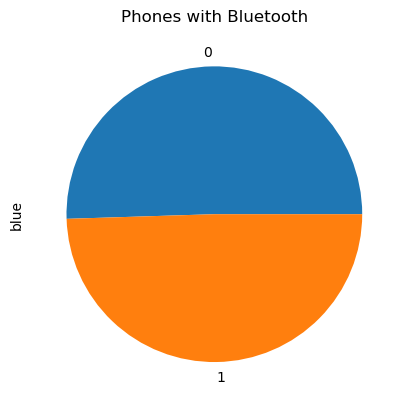

In [622]:

bluetooth_count = df_train['blue'].value_counts()
print(bluetooth_count)
bluetooth_count.plot(kind='pie')
plt.title('Phones with Bluetooth')
plt.show()

1    1014
0     986
Name: wifi, dtype: int64


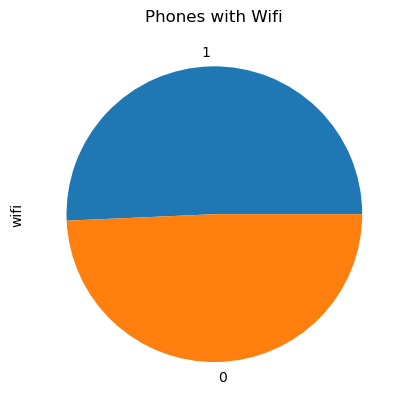

In [623]:
wifi_count = df_train['wifi'].value_counts()
print(wifi_count)
wifi_count.plot(kind='pie')
plt.title('Phones with Wifi')
plt.show()

1    1019
0     981
Name: dual_sim, dtype: int64


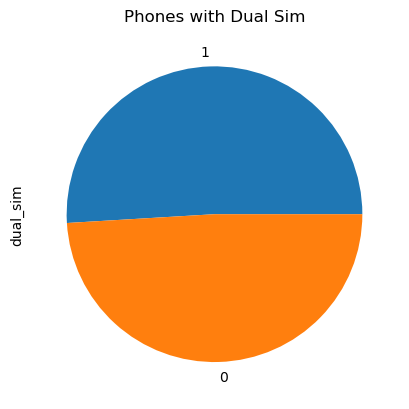

In [624]:
dual_sim_count = df_train['dual_sim'].value_counts()
print(dual_sim_count)

dual_sim_count.plot(kind='pie')
plt.title('Phones with Dual Sim')
plt.show()


1    1523
0     477
Name: three_g, dtype: int64


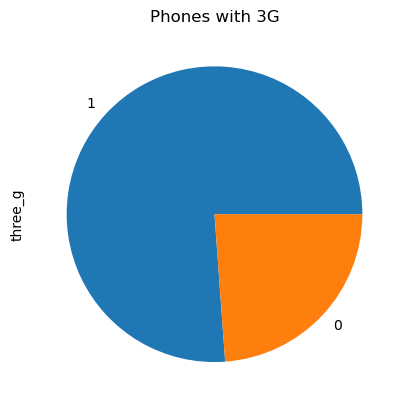

In [625]:
count_3g = df_train['three_g'].value_counts()
print(count_3g)

count_3g.plot(kind='pie')
plt.title('Phones with 3G')
plt.show()

1    1043
0     957
Name: four_g, dtype: int64


Text(0.5, 1.0, 'Phones with 4G')

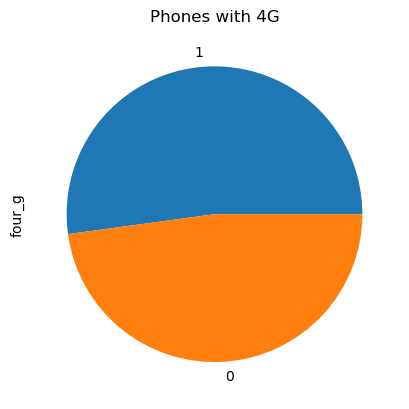

In [626]:
count_4g  = df_train['four_g'].value_counts()
print(count_4g)

count_4g.plot(kind='pie')
plt.title('Phones with 4G')

<Axes: >

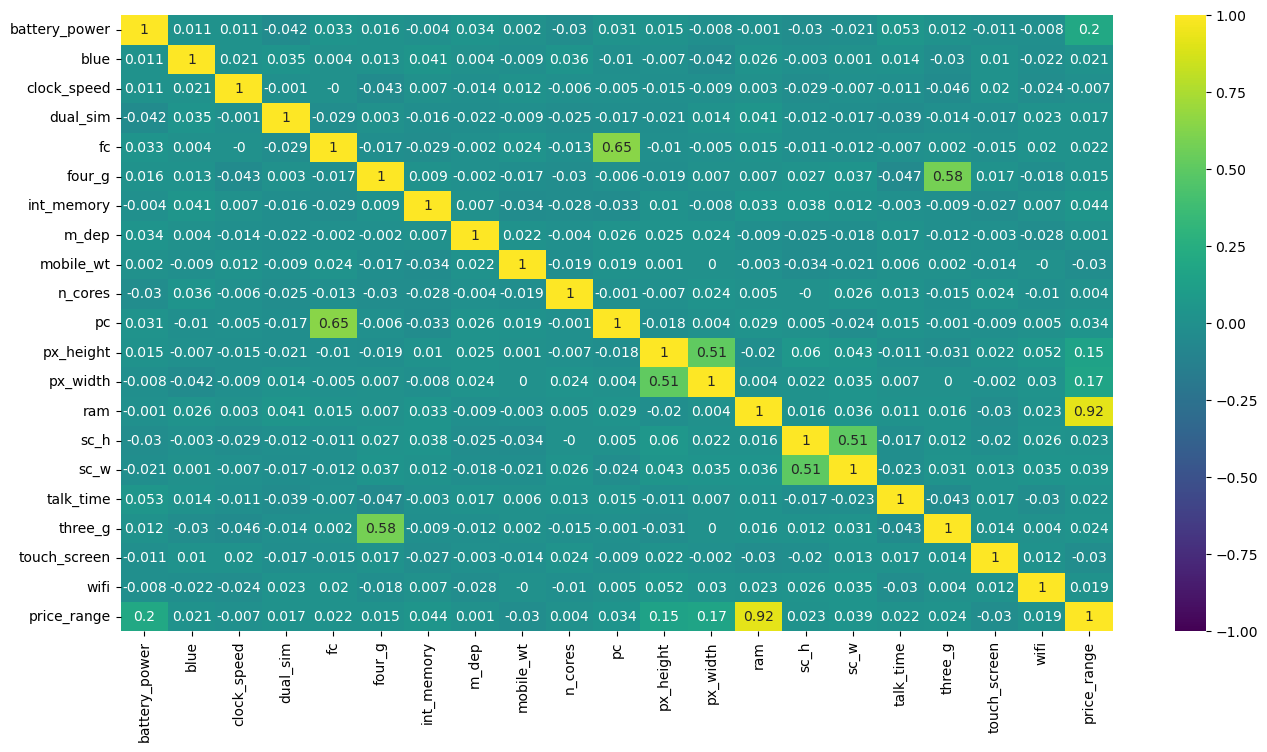

In [627]:
# round up the values from the correlation matrix
corr = df_train.corr()
corr = np.round(corr, 3)

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1, )

<b>Observation:</b>
<p>Primary camera seems to be highly correlated with front camera and four G and Three G, screen width and height. Aso the feature that is most highly correlated with the price is the ram.</p>

In [628]:
df_train['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [629]:
df_train['pc'].value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

## Data Preprocessing

In [630]:
X_train = df_train.drop('price_range', axis=1)
y_train = df_train['price_range']

X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [631]:
X_test = mobile_test.copy()

X_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


### Feature Scaling

In [632]:
from sklearn.preprocessing import MinMaxScaler

def scale_feats(input_data):
    scaler = MinMaxScaler()
    scaler.fit(input_data)
    scaled_data = scaler.transform(input_data)
    
    return scaled_data

In [633]:
X_train_scaled = scale_feats(X_train)
X_test_scaled = scale_feats(X_test)

### Base Model

#### Logistic Regression

In [634]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [635]:
log_reg.score(X_train_scaled, y_train)

0.947

#### SGD

In [636]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier()

In [637]:
sgd_clf.score(X_train_scaled, y_train)

0.7785

In [638]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [639]:
tree_clf.score(X_train_scaled, y_train)

1.0

In [640]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

log_reg = LogisticRegression(max_iter=1000)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=cv)
print(log_reg_scores)
print(log_reg_scores.mean())

[0.925 0.895 0.935 0.95  0.93  0.945 0.925 0.93  0.915 0.925 0.925 0.935
 0.95  0.9   0.905 0.94  0.93  0.92  0.915 0.91  0.925 0.925 0.93  0.95
 0.915 0.925 0.9   0.935 0.91  0.93 ]
0.9249999999999999


In [641]:
sgd_clf = SGDClassifier()
sgd_clf_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=10)
print(sgd_clf_scores)
print(sgd_clf_scores.mean())

[0.75  0.675 0.765 0.74  0.78  0.72  0.74  0.76  0.725 0.76 ]
0.7414999999999999


In [642]:
tree_clf = DecisionTreeClassifier()
tree_clf_scores = cross_val_score(tree_clf, X_train_scaled, y_train, cv=10)
print(tree_clf_scores)
print(tree_clf_scores.mean())

[0.78  0.875 0.835 0.82  0.84  0.83  0.82  0.805 0.85  0.795]
0.825


In [643]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

log_reg = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
log_reg_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=cv)

accuracy_score(y_train, log_reg_pred)

0.9275

In [644]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, log_reg_pred)

array([[488,  12,   0,   0],
       [ 26, 443,  31,   0],
       [  0,  35, 438,  27],
       [  0,   0,  14, 486]])

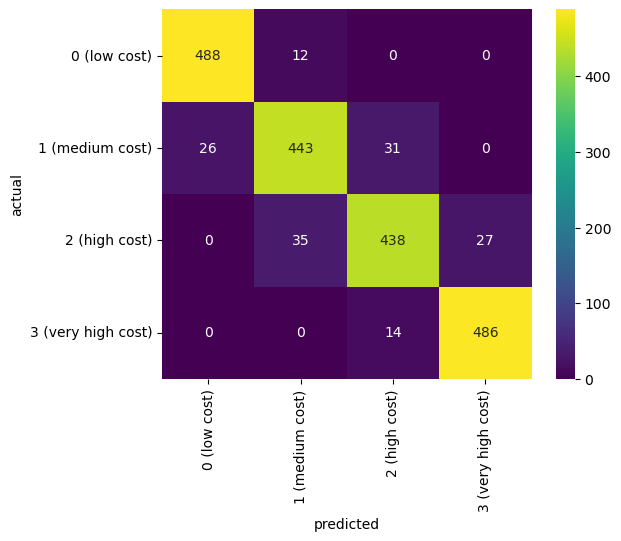

In [645]:
cm = confusion_matrix(y_train, log_reg_pred)

sns.heatmap(cm, square=True, annot=True, cmap='viridis', fmt='g',
            xticklabels=['0 (low cost)', '1 (medium cost)', '2 (high cost)', '3 (very high cost)'], 
            yticklabels=['0 (low cost)', '1 (medium cost)', '2 (high cost)', '3 (very high cost)'])
plt.ylabel('actual')
plt.xlabel('predicted')

plt.show()

In [646]:
from sklearn.metrics import classification_report

print(classification_report(y_train, log_reg_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       500
           1       0.90      0.89      0.89       500
           2       0.91      0.88      0.89       500
           3       0.95      0.97      0.96       500

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



## Feature Selection

In [647]:
# print best features
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)

featureScores.columns = ['Specs', 'Score']

print(featureScores.nlargest(10, 'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [648]:
columns_to_select = ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h']

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_selected = X_train_scaled_df[columns_to_select]

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)
ypred = log_reg.predict(X_train_selected)

accuracy_score(y_train, ypred)

0.958

In [649]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

results = list()

for k in range(1, X_train_scaled.shape[1] + 1):
    log_reg = LogisticRegression(max_iter=1000)
    fs = SelectKBest(score_func=chi2, k=k)
    pipeline = Pipeline([('feature_selection', fs), ('classification', log_reg)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

>1 0.753 (0.021)
>2 0.822 (0.022)
>3 0.893 (0.020)
>4 0.944 (0.016)
>5 0.943 (0.016)
>6 0.943 (0.017)
>7 0.943 (0.018)
>8 0.941 (0.017)
>9 0.939 (0.015)
>10 0.937 (0.015)
>11 0.934 (0.016)
>12 0.936 (0.014)
>13 0.932 (0.016)
>14 0.930 (0.015)
>15 0.929 (0.014)
>16 0.929 (0.015)
>17 0.926 (0.016)
>18 0.927 (0.014)
>19 0.926 (0.015)
>20 0.925 (0.014)


## Final Model

In [650]:
log_reg = LogisticRegression(max_iter=1000)
fs = SelectKBest(score_func=chi2, k=4)
pipeline = Pipeline([('feature_selection', fs), ('classification', log_reg)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 
print('>%.3f (%.3f)' % (np.mean(scores), np.std(scores)))

>0.944 (0.016)


In [651]:
log_reg = LogisticRegression(max_iter=1000)
fs = SelectKBest(score_func=chi2, k=4)
pipeline = Pipeline([('feature_selection', fs), ('classification', log_reg)])
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
log_reg_pred = cross_val_predict(pipeline, X_train_scaled, y_train, cv=cv)

accuracy_score(y_train, log_reg_pred)

0.9445

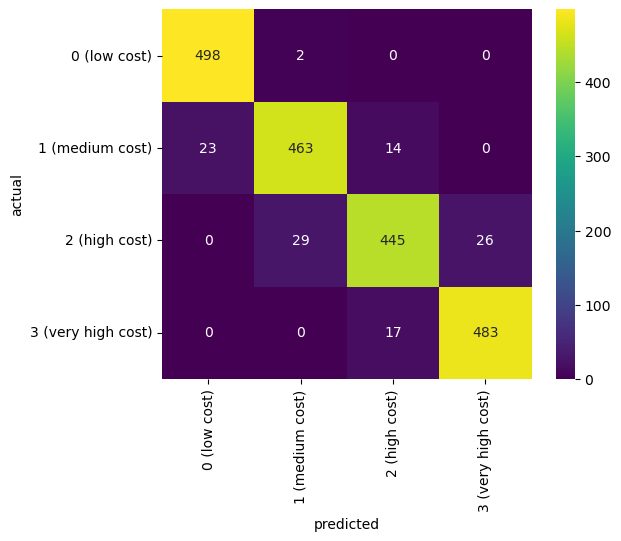

In [652]:
cm = confusion_matrix(y_train, log_reg_pred)

sns.heatmap(cm, square=True, annot=True, cmap='viridis', fmt='g',
            xticklabels=['0 (low cost)', '1 (medium cost)', '2 (high cost)', '3 (very high cost)'], 
            yticklabels=['0 (low cost)', '1 (medium cost)', '2 (high cost)', '3 (very high cost)'])
plt.ylabel('actual')
plt.xlabel('predicted')

plt.show()

In [653]:
print(classification_report(y_train, log_reg_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       500
           1       0.94      0.93      0.93       500
           2       0.93      0.89      0.91       500
           3       0.95      0.97      0.96       500

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

